# Exploratory Data Analysis and Correlation in Movies Data

This project is divided into two main parts. The first part consists of exploring the data to understand the distribution across various factors. The second part provides insights into the relationship between different features of movies.

In [34]:
# Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [2]:
# Read in the data
df = pd.read_csv('movies.csv')

## Inspecting the Data

In [5]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [6]:
df.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,NaN,PK 65 Films,102.0


In [7]:
df.shape

(7668, 15)

In [8]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

## Dealing with missing Data

In [10]:
# Checking for missing data in the dataset
for col in df.columns:
    missing = np.sum(df[col].isnull())
    print('{} - {}'.format(col,missing))

name - 0
rating - 77
genre - 0
year - 0
released - 2
score - 3
votes - 3
director - 0
writer - 3
star - 1
country - 3
budget - 2171
gross - 189
company - 17
runtime - 4


In [11]:
# Dropping the missing values to avoid problems when making correlations
df.dropna(inplace=True)

In [12]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Converting Data types as required

In [13]:
# Converting the datatype of votes, gross and budget columns from float to integer
df['votes'] = df['votes'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['budget'] = df['budget'].astype('int64')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


##### Upon inspection of the released column and year column, we see that the year and released data are different in some of the entries. To deal with this, I created a new column named 'correctyear' that holds the 'year' extracted from the 'released' column

In [14]:
# Convert released column type to string
df['released'] = df['released'].astype(str)

In [15]:
df['correctyear'] = df['released'].str.extract('(\d{4})')

In [16]:
# Check the correctyear column to see if there are any irregularitites in it
df['correctyear'].unique()

array(['1980', '1981', '1984', '1983', '1982', '1987', '1985', '1986',
       '1990', '1988', '1992', '1989', '1991', '1999', '1994', '1993',
       '1995', '2001', '1996', '2000', '1997', '1998', '2002', '2003',
       '2004', '2019', '2014', '2005', '2006', '2007', '2008', '2010',
       '2009', '2013', '2011', '2016', '2015', '2012', '2017', '2018',
       '2020'], dtype=object)

In [17]:
df.shape

(5421, 16)

In [18]:
# Drop any duplicates in the dataset

df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020


In [19]:
# Sorting by gross
df.sort_values(by=['gross'],inplace=False,ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


## Exploratory Data Analysis - Part I

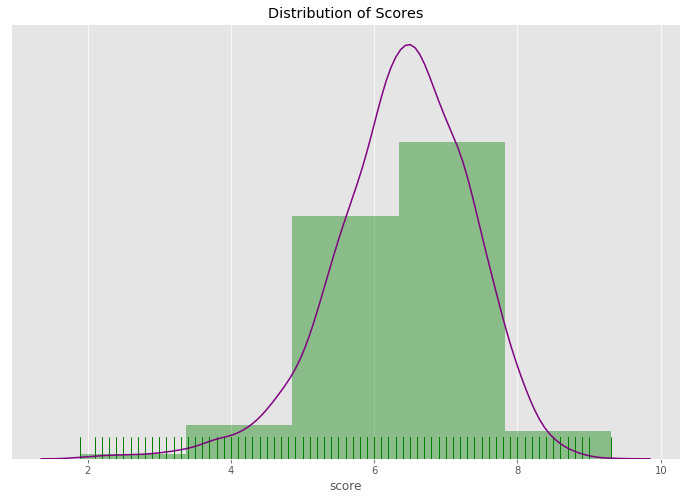

In [22]:
# Exploring the dataset by Visualizing different features of it
sns.distplot(df['score'],bins=5,color='g',rug=True,kde_kws={'color':'purple'})

ax = plt.gca()
ax.axes.yaxis.set_visible(False)

plt.title('Distribution of Scores')
plt.show()

The histogram shows that most of the scores are present between 5 and 8.

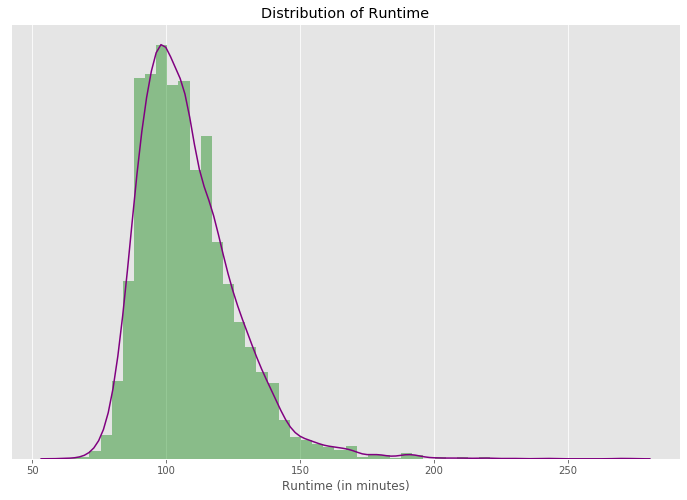

In [23]:
# Visualizing the distribution of runtime
sns.distplot(df['runtime'],color='g',kde_kws={'color':'purple'})

ax = plt.gca()
ax.axes.yaxis.set_visible(False)

plt.title('Distribution of Runtime')
plt.xlabel('Runtime (in minutes)')
plt.show()

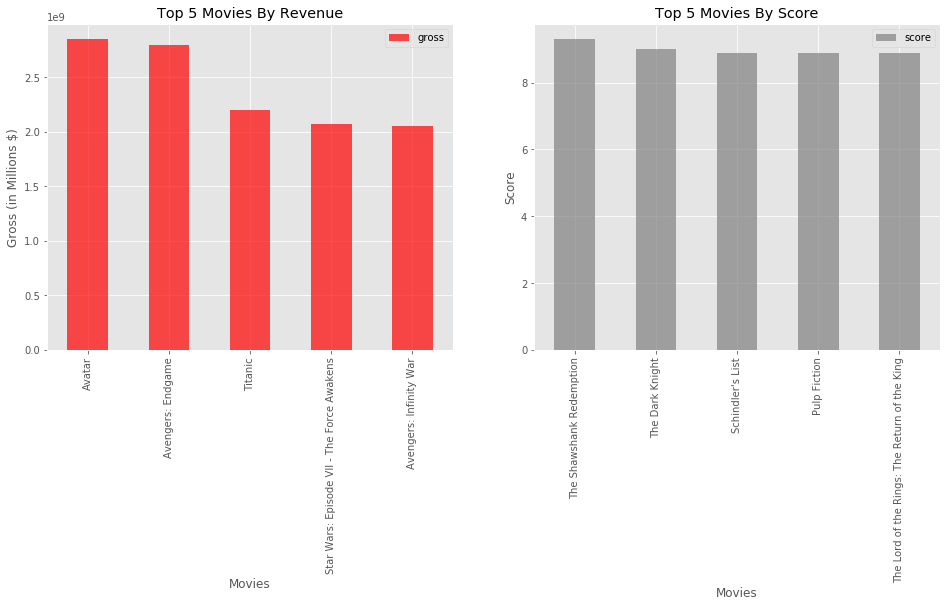

In [25]:
# Top 5 Movies by Revenue and Score
top_5_by_revenue = df.sort_values(by='gross',ascending=False)[:5]
top_5_by_score = df.sort_values(by='score',ascending=False)[:5]

plt.rcParams['figure.figsize'] = 16, 6

fig,ax=plt.subplots(1,2)
top_5_by_revenue.plot(x='name',y='gross',kind='bar',ax=ax[0],title='Top 5 Movies By Revenue',color='r',alpha=0.7)
top_5_by_score.plot(x='name',y='score',kind='bar',ax=ax[1],title='Top 5 Movies By Score',color='grey',alpha=0.7)

ax[0].set_xlabel('Movies')
ax[0].set_ylabel('Gross (in Millions $)')
ax[1].set_xlabel('Movies')
ax[1].set_ylabel('Score')

plt.show()

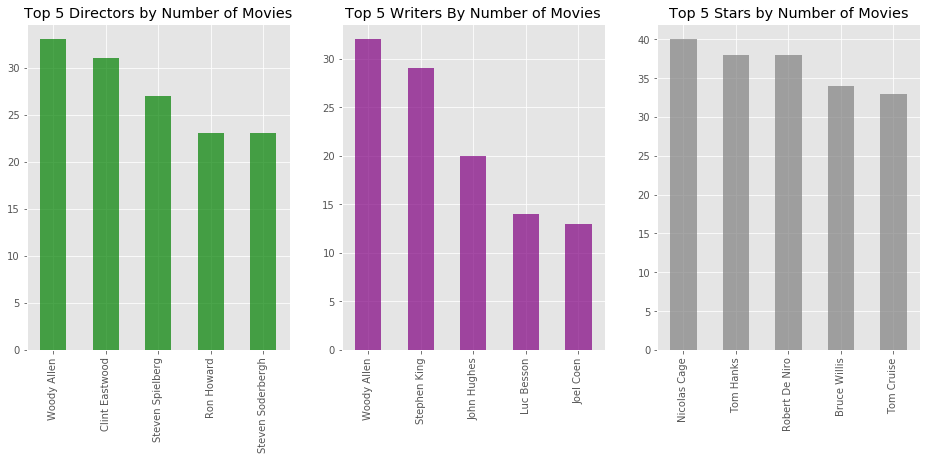

In [26]:
# Top 5 directors, writers, and stars by the number of movies made
top_5_directors = df['director'].value_counts()[:5]
top_5_writers = df['writer'].value_counts()[:5]
top_5_stars = df['star'].value_counts()[:5]

plt.rcParams['figure.figsize'] = 16, 6

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1)
top_5_directors.plot(ax=ax1,kind='bar',title='Top 5 Directors by Number of Movies',color='g',alpha=0.7)
top_5_writers.plot(ax=ax2,kind='bar',title='Top 5 Writers By Number of Movies',color='purple',alpha=0.7)
top_5_stars.plot(ax=ax3,kind='bar',title='Top 5 Stars by Number of Movies',color='grey',alpha=0.7)


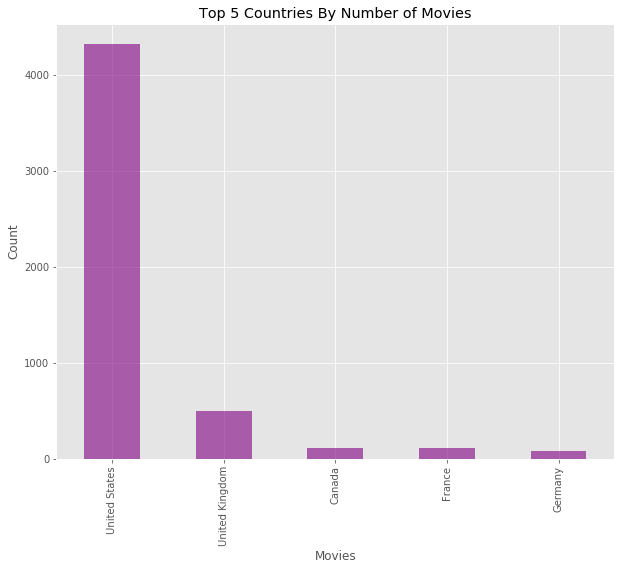

In [27]:
# Top 5 Countries By Number of Movies
matplotlib.rcParams['figure.figsize'] = (10,8)

top_5_by_country = df['country'].value_counts()[:5]
top_5_by_country.plot(kind='bar',title='Top 5 Countries By Number of Movies',color='purple',alpha=0.6)

plt.xlabel('Movies')
plt.ylabel('Count')

plt.show()

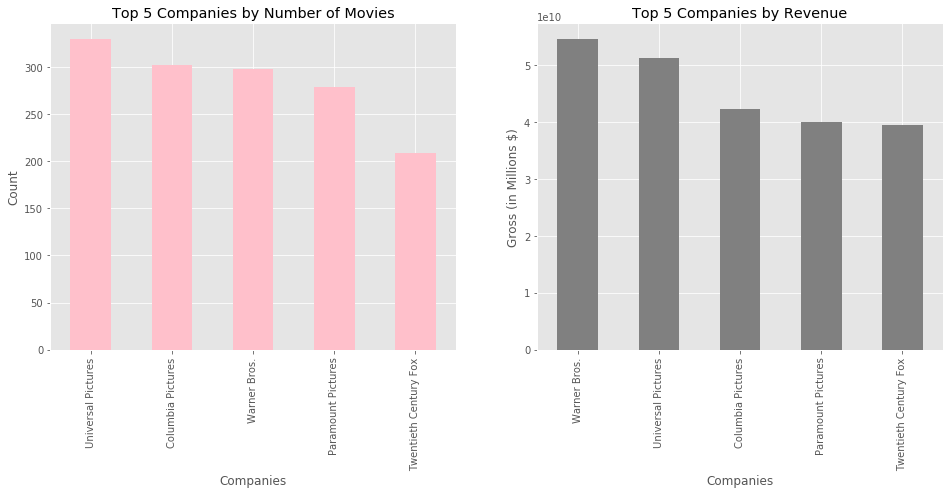

In [28]:
# Top 5 Companies by Number of Movies and By Revenue
plt.rcParams['figure.figsize'] = 16, 6


top_5_companies_by_num_movies = df['company'].value_counts()[:5]
top_5_companies_by_revenue = df.groupby('company').sum()['gross'].sort_values(ascending=False)[:5]

fig, ax = plt.subplots(1,2)
top_5_companies_by_num_movies.plot(kind='bar',ax=ax[0],title='Top 5 Companies by Number of Movies',color='pink')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Companies')

top_5_companies_by_revenue.plot(kind='bar',ax=ax[1],title='Top 5 Companies by Revenue',color='grey')
ax[1].set_ylabel('Gross (in Millions $)')
ax[1].set_xlabel('Companies')

plt.show()

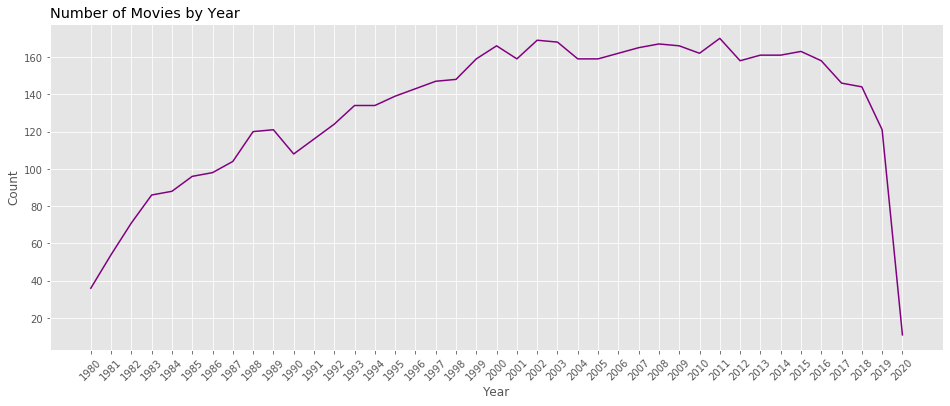

In [29]:
# Number of Movies released per year
release_year = df.groupby('correctyear').count()

sns.lineplot(x=release_year.index,y='name',data=release_year,color='purple')

plt.xticks(rotation=45)
plt.title('Number of Movies by Year',loc='left')
plt.xlabel('Year')
plt.ylabel('Count')

plt.show()

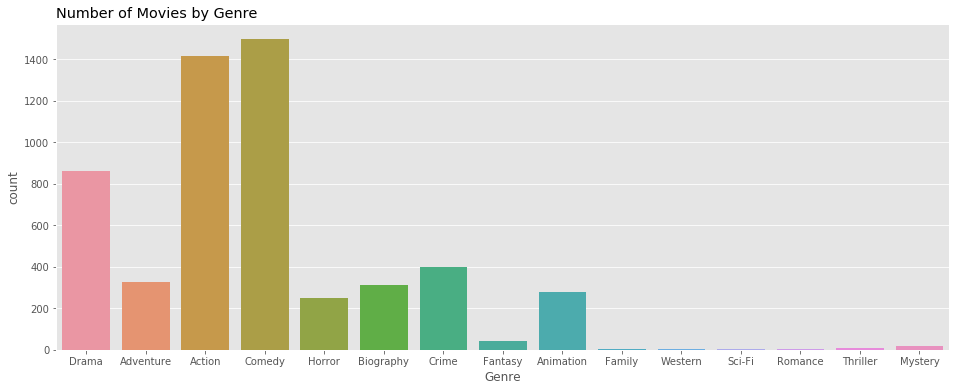

In [30]:
# Number of Movies by Genre
sns.countplot(x='genre',data=df)

plt.title('Number of Movies by Genre',loc='left')
plt.xlabel('Genre')

plt.show()

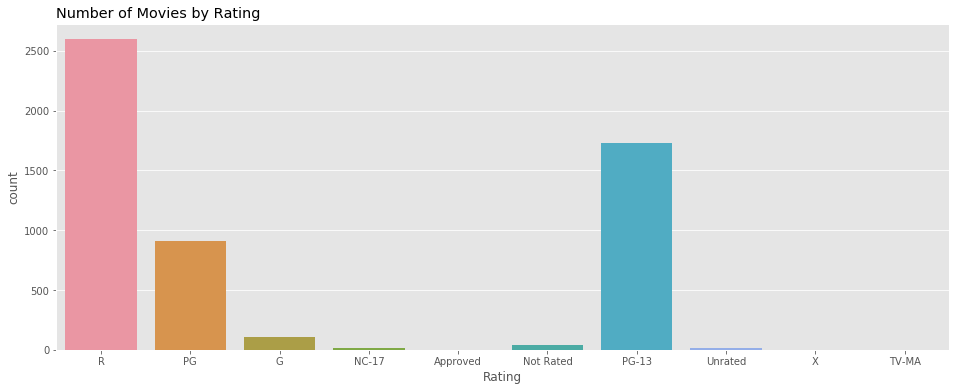

In [31]:
# Number of Movies by Rating
sns.countplot(x='rating',data=df)
plt.title('Number of Movies by Rating',loc='left')
plt.xlabel('Rating')
plt.show()

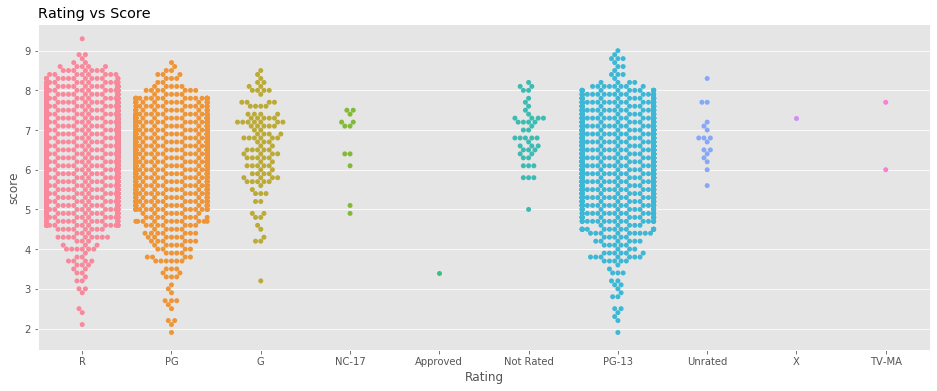

In [32]:
# Relation between rating and score, also gives a visual representation to the number of movies by genre
sns.swarmplot(x = 'rating',y='score', data=df)

plt.title('Rating vs Score',loc='left')
plt.xlabel('Rating')

plt.show()

#### The number of movies released decrease near 2020 probably because of Covid-19.

## Correlation - Part II

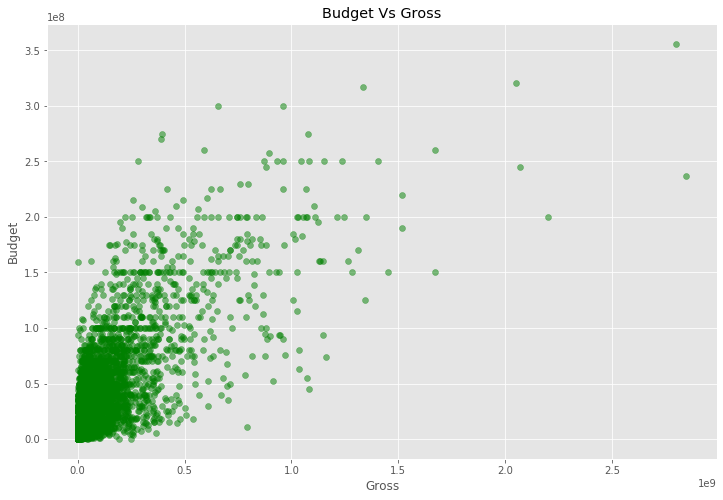

In [35]:
# Plotting gross vs budget on a scatterplot
plt.scatter(x=df['gross'],y=df['budget'],alpha=0.5,color='g')

plt.title('Budget Vs Gross')
plt.xlabel('Gross')
plt.ylabel('Budget')

plt.show()

Text(0.5, 1.0, 'Regression Plot: Budget vs Gross')

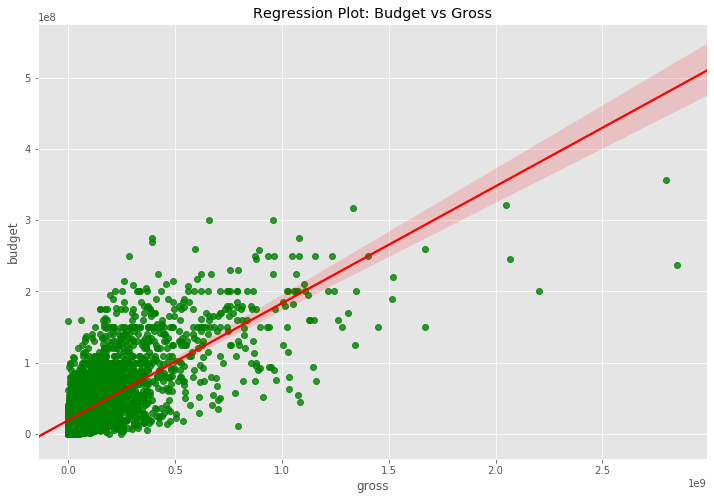

In [36]:
# Regression plot for Budget vs Gross
sns.regplot(x='gross',y='budget',data=df,scatter_kws={'color':'green'},line_kws={'color':'red'})
plt.title('Regression Plot: Budget vs Gross')

In [37]:
# Correlation Matrix
correlation_matrix=df.corr()
correlation_matrix

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


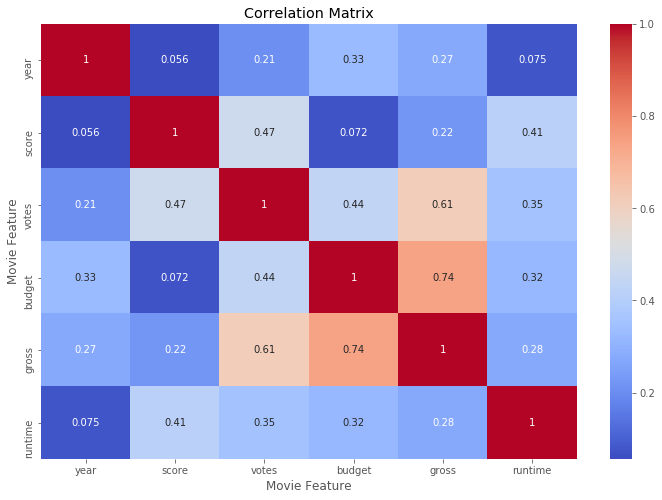

In [38]:
# Visualizing the correlation matrix on a heatmap
ax = sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

plt.title('Correlation Matrix')
plt.xlabel('Movie Feature')
plt.ylabel('Movie Feature')

plt.show()

In [39]:
# Creating a correlation matrix for the entire dataset
df_numerized = df
for col in df_numerized.columns:
    if df_numerized[col].dtype == 'object':
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes

In [40]:
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
0,4692,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146.0,0
1,3929,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104.0,0
2,3641,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124.0,0
3,204,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88.0,0
4,732,6,4,1980,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,2020,904,6.6,140000,16,2390,1812,47,90000000,426505244,452,124.0,40
7649,3556,4,0,2020,713,6.5,102000,852,2309,147,47,85000000,319715683,1108,99.0,40
7650,1153,4,1,2020,904,5.6,53000,1809,2827,1470,47,175000000,245487753,1397,101.0,40
7651,3978,4,1,2020,758,6.8,42000,294,2091,640,6,135000000,111105497,12,100.0,40


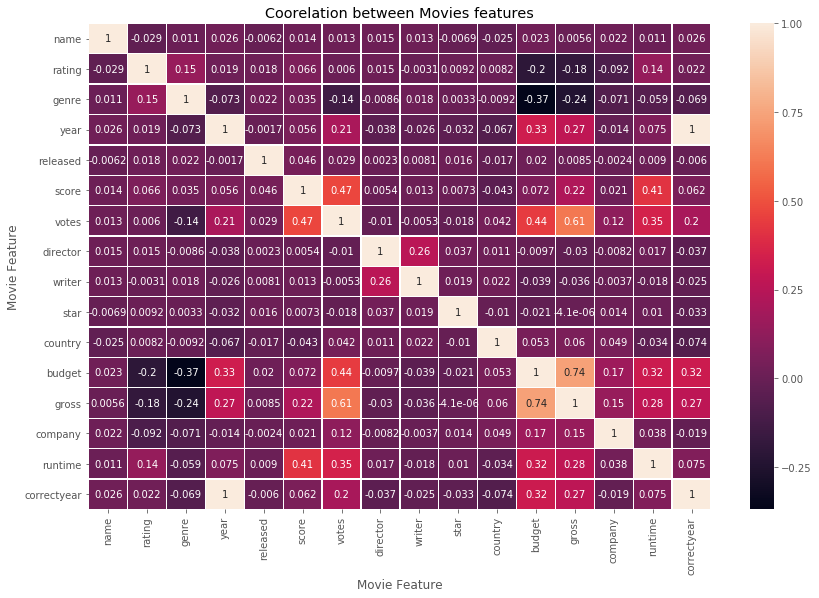

In [41]:
# Correlation Matrix
coorelation_matrix = df_numerized.corr()
# Visuzlizaing on a heatmap
ax = sns.heatmap(coorelation_matrix,annot=True,linewidth=0.3)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

plt.tight_layout()
plt.title('Coorelation between Movies features')
plt.xlabel('Movie Feature')
plt.ylabel('Movie Feature')
plt.show()

## Findings

- There is a strong correlation between budget and gross. The more the money spent on a movie, the higher the revenue.
- A correlation of 0.6 exists between votes and gross. The more the money spent on a movie, the better will be its quality and hence a higher vote count.
